In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.optimize import fsolve

In [2]:
a,b,c,d = 1.5,0.05,0.48,0.05

In [3]:
alpha = 1.5 # taux de reproduction des proies
beta = 0.05 # taux de mortalité des proies dû aux prédateurs rencontrés
gamma = 0.48 # taux de mortalité des prédateurs
delta = 0.05 # taux de reproduction des prédateurs en fonction des proies rencontrées et mangées

# Q1) Analyse de l'équation

alpha : taux de reproduction des proies  
beta : taux de mortalité des proies dû aux prédateurs rencontrés  
gamma : taux de mortalité des prédateurs  
delta : taux de reproduction des prédateurs en fonction des proies rencontrées et mangées

## Points d'équilibre 

Posons : 

$f:(x_1,x_2,t) \to (x_1(\alpha -\beta x_2 ),-x_2 (\gamma - \delta x_1))$. f est autonome donc nous n'écrirons plus t par la suite.

Les points d'équilibres sont tel que : 
$f(x_1^{eq},x_2^{eq}) = (0,0)$
Ce qui laisse les possibilités : 
$(x_1^{eq},x_2^{eq}) = (0,0)  \,\,\, ou \,\,\, (x_1^{eq},x_2^{eq}) = ( \frac{\gamma}{\delta }, \frac{\alpha}{\beta })$

### Stabilité: 

On calcul la jabobienne de f : 
$J_f(x1,x2) = \begin{pmatrix} \alpha - \beta x_2 
 & -\beta x_1\\ \delta x_2
 & -\gamma + \delta x_1
\end{pmatrix}$

Alors : $J_f(0,0) = \begin{pmatrix} \alpha 
 & 0\\ 0
 & -\gamma
\end{pmatrix}$, les valeurs propres sont $\alpha>0 \,\,\, et \,\,\, -\gamma<0$
Donc le point d'équilibre (0,0) est instable car $\alpha>0$.

De plus on a : $$J_f(\frac{\gamma}{\delta },\frac{\alpha}{\beta }) = \begin{pmatrix} 0
 & - \frac{\beta\gamma}{\delta } \\ \frac{\delta\alpha}{\beta }
 & 0 
\end{pmatrix}$$
Le polynôme caractéristique correspondant à la matrice est : 

$\chi(x) = x^2 + \alpha\gamma $
De valeurs propres : $+/- i\sqrt{\alpha\gamma}$

La partie réelle des valeurs propres étant 0, on ne peut pas conclure quant à la stabilité de ce point d'équilibre.

# Q2) Représentation visuelle du champ de vecteurs

In [4]:
X=np.linspace(0,60,20)
Y=np.linspace(0,60,20)
Mesh = np.meshgrid(X,Y)
MX=Mesh[0]
MY=Mesh[1]

VX = MX*(alpha-beta*MY)
VY = -MY*(gamma - delta*MX)

Text(0.5, 1.0, 'Champ de vecteur')

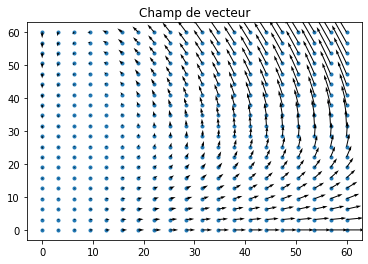

In [5]:
plt.scatter(MX,MY,marker='.')
plt.quiver(MX,MY,VX,VY)
plt.title("Champ de vecteur")

Text(0.5, 1.0, 'portrait de phase')

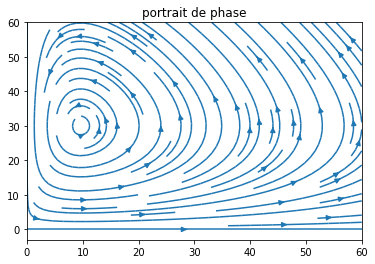

In [6]:
plt.streamplot(MX,MY,VX,VY)
plt.title("portrait de phase")

Les trajectoires du portrait de phase sont fermées et entourent le point d'équilibre, ainsi les solutions vont osciller autour de ce dernier point.

# Q3)

La fonction f définie à la question 1 est continue sur $\mathbb{R}^2$ car ses composantes sont continues et elle est même continuement différentiable sur $\mathbb{R}^2$ car sa jacobienne $J_f(x1,x2) = \begin{pmatrix} \alpha - \beta x_2 
 & -\beta x_1\\ \delta x_2
 & -\gamma + \delta x_1
\end{pmatrix}$ existe et est continue sur $\mathbb{R}^2$ car ses composantes sont des fonctions polynomiales de plusieurs variables.

Alors d'après le théorème de Cauchy-Lipschitz, pour tout $(t_0,x_{10},x_{20}) \in \mathbb{R}^2$, il existe une unique solution maximale $(x_1,x_2)$ passant par ce point.

On considère alors l'unique solution initialisée par $(t_0,x_{10},x_{20}) \in \mathbb{R}^{+*} \times \mathbb{R}^{+*} $ continue et non constante (car sinon elle reste bien dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$ ) noté $(x_1,x_2)$. 

Si une des deux composantes devient négative ou nulle à un moment $t_1$ donné, comme $x_1 et x_2$ sont continuent, elles doivent passer par 0 (théorème des valeurs intermédiaires). Supposons que notre solution passe aussi par le point $(t_1,a,0)$ où a est réel.

Or une solution de la forme $(x'_1,0)$ passe par $(t_1,a,0)$. Par unicité des solutions on aurait donc $(x'_1,0) = (x_1,x_2)$ or $x_{20}>0$ n'est jamais atteint pour une telle solution donc finalement les composantes d'une solution $(x_1,x_2)$ ne s'annulent jamais et sont toujours strictements positivent sur $\mathbb{R}^+$.

# Q4)

dH/dt = 0

La solution initialisé dans R+* reste dans R+* d'après Q3, 
RQ : La solution x(t) ne diverge pas car H(x1,x2) = H(x1(0),x2(0)) pour tout t.

Or

Supposons que la solution (unique) maximale l'est sur un intervalle du type ]a,b["] où a et b sont finie. alors d'apres le th de domaine maximal d'existence (f est continue), soit lim x = +- inf (ce qui est impossible ici) , soit (t,x) tend vers la frontiere de l'ensemble. donc a -> - inf et b - > + inf absurde 

donc la solution est def sur R



# Q5) Représentation des courbes de niveau de H

In [7]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

In [8]:
def H(x1, x2) :
    return( delta*x1 - gamma* np.log(x1)+beta*x2 - alpha* np.log (x2))

In [31]:
%matplotlib inline

<ipython-input-8-2ff7d49f9ff6>:2: RuntimeWarning: divide by zero encountered in log
  return( delta*x1 - gamma* np.log(x1)+beta*x2 - alpha* np.log (x2))


<IPython.core.display.Javascript object>


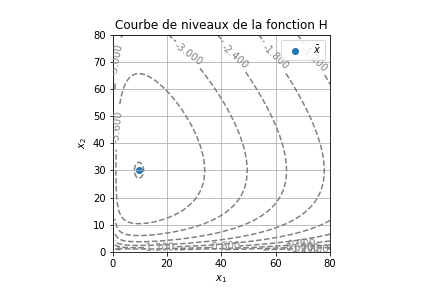

In [30]:
display_contour(
    H, 
    x=np.linspace(0, 80, 100), 
    y=np.linspace(0, 80, 100), 
    levels=10 
)
xb= (gamma/delta, alpha/beta)

plt.scatter(xb[0],xb[1],label=r'$\bar{x}$')
plt.title("Courbe de niveaux de la fonction H")
plt.legend()

On remarque alors que le point $\bar{x}$ se situe au centre des courbes de niveau, c'est donc un extrémum de la fonction H. De plus les lignes de niveaux sont décroissante, ainsi le point $\bar{x}$ est un minimum pour H.   
Graphiquement, le point $\bar{x}$ est donc stable car les courbes de niveau permettent de caractériser les solution du système, et elle sont fermées et bornées autour de ce dernier. Ainsi,  les solutions restent arbitrairement proche de $\bar{x}$ quand elles sont initialisées suffisamment proche de $\bar{x}$.   

rq : on peut le prouver en exploitant la fonction de Lyapunov V(x) = H(x) -H($\bar{x}$)

# Q6) Fonction Euler explicite

## Intégration

In [10]:
def solve_euler_explicite(f,x0,dt,ti,tf) :
    X=[x0]
    T=[ti]
    t = ti
    while t<tf : 
        x = X[-1] + dt*f(t,X[-1])
        X.append(x)
        t=t+dt
        T.append(t)
    return(T,X)

## Test sur une equation connue

Text(0.5, 1.0, 'tracé de y=cos(x)')

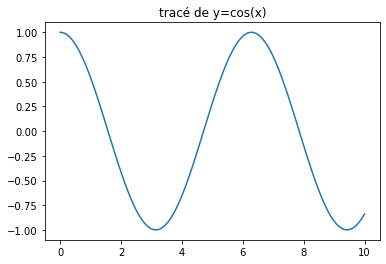

In [38]:
X=np.linspace(0,10,100)
Y=np.cos(X)
plt.plot(X,Y)
plt.title("tracé de y=cos(x)")

Système différentiel à résoudre : 
$$\left\{\begin{matrix}
\frac{dx^2}{dt^2} + x =0\\ x(0)=1
\\\frac{dx}{dt}(0) = 0
\end{matrix}\right.$$

On a alors : $$f(x_1,x_2) = \begin{pmatrix} x_2
\\ -x_1 
\end{pmatrix}$$  

In [41]:
def f(t,X):
    return(np.array([X[1],-X[0]]))
dt=10**(-3)
Z=solve_euler_explicite(f,[1,0],dt,0,10)

YE=[Z[1][i][0] for i in range(0,len(Z[1])) ]

Text(0.5, 1.0, 'tracé de la solution approché du système')

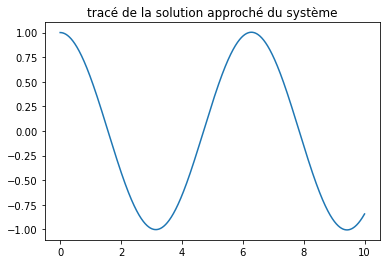

In [45]:
plt.plot(Z[0],YE)

plt.title("tracé de la solution approché du système")

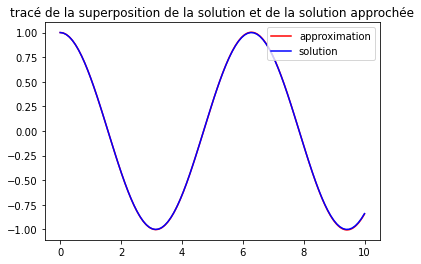

In [51]:
plt.plot(Z[0],YE, c='r',label='approximation')
plt.plot(X,Y,c='b',label='solution')
plt.title("tracé de la superposition de la solution et de la solution approchée")
plt.legend()

## Ordre de convergence de la méthode : 

In [32]:
DT = np.arange(10**(-3),10**(-1),10**(-3)/2)

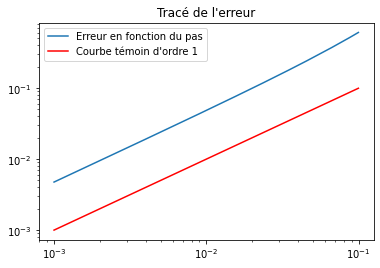

In [37]:
ERR=[]
for dt in DT :
    Z=solve_euler_explicite(f,[1,0],dt,0,10)
    YE=[Z[1][i][0] for i in range(0,len(Z[1])) ] # on extrait x(t)
    
    Eps = max(abs(np.cos(Z[0]) - YE)) # erreur max comise : max|cos(t) - x(t)|
    ERR.append(Eps)
    
plt.loglog(DT,ERR,label = 'Erreur en fonction du pas')
plt.loglog(DT,DT,color='r',label ="Courbe témoin d'ordre 1") 
plt.title("Tracé de l'erreur")
plt.legend()

On observe bien un coefficient directeur identique, égale à 1, donc l'ordre de convergence est de 1, en accord avec le cours.

# Q7) Euler explicite pour les équations de Lotka-Volterra 

### Résolution

In [16]:
def f_Lotka(t,X):
    return(np.array([X[0]*(alpha-beta*X[1]),
                     -X[1]*(gamma-delta*X[0])]))

In [94]:
dt=0.001

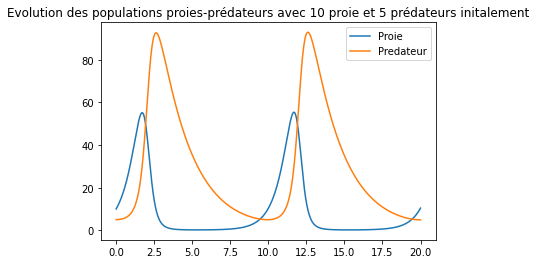

In [95]:
Z_Lotka = solve_euler_explicite(f_Lotka,[10,5],dt,0,20)
Proie = [Z_Lotka[1][i][0] for i in range(0,len(Z_Lotka[1]))]
Predateur = [Z_Lotka[1][i][1] for i in range(0,len(Z_Lotka[1]))]
plt.plot(Z_Lotka[0],Proie,label='Proie')
plt.plot(Z_Lotka[0],Predateur,label='Predateur')
plt.title("Evolution des populations proies-prédateurs avec 10 proie et 5 prédateurs initalement")
plt.legend()

On remarque qu'au temps longs un motif périodique apparait, cette solution peut tout à fait correspondre à la réalité.

### Tracé de la fonction H

Text(0.5, 1.0, 'tracé de la fonction H')

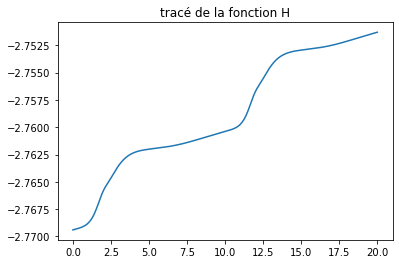

In [96]:
H_Lotka = H(np.array(Proie),np.array(Predateur))
plt.plot(Z_Lotka[0],H_Lotka)
plt.title("tracé de la fonction H")

La fonction H semble évoluer lentement dans le temps, alors qu'elle devrait être constante, cela est probablement due aux approximations et erreurs de la méthode d'Euler.

# Q8 Euler implicite

## Intégration : 

In [20]:
def point_Fixe_f(f,X,t,dt,eps = 0.05) :
    Y0 = X + dt * f(t,X)
    Y=Y0
    while np.linalg.norm((X + dt*f(t+dt,Y) -Y)) > eps*np.linalg.norm(Y0) :
        Y = X + dt*f(t+dt,Y)
    return(Y)

def solve_euler_implicit2(f,x0,dt,t0,tf,itermax =10000) : 
    t=t0
    T=[t]
    X=[x0]
    iter = 0
    while t<tf and iter<=itermax :
        x = point_Fixe_f(f,X[-1],t,dt)
        X.append(x)
        t=t+dt
        T.append(t)
        iter = iter +1
    return (T,X)

## Test sur une solution connue : x=cos(t)

Text(0.5, 1.0, 'tracé de la solution approché du système')

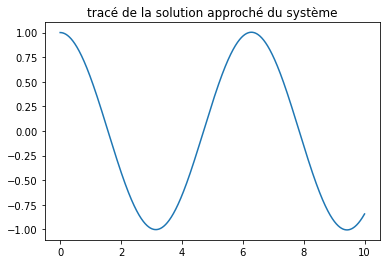

In [71]:
ZZ = solve_euler_implicit2(f,[1,0],dt,0,10,10000)
Y=[ZZ[1][i][0] for i in range(0,len(ZZ[1]))]
plt.plot(ZZ[0],Y)
plt.title("tracé de la solution approché du système")

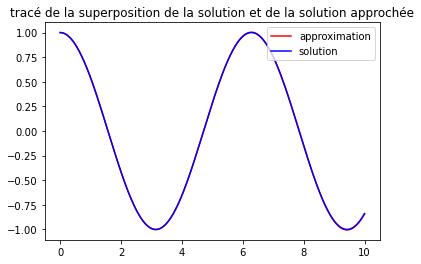

In [72]:
plt.plot(ZZ[0],Y, c='r',label='approximation')
plt.plot(ZZ[0],np.cos(ZZ[0]),c='b',label='solution')
plt.title("tracé de la superposition de la solution et de la solution approchée")
plt.legend()

## Sur les équations de Lotka-Volterra

### Résolution : 

In [106]:
dt=0.001

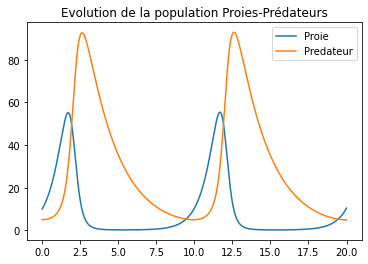

In [107]:
Z_Lotka_imp = solve_euler_implicit2(f_Lotka,[10,5],dt,0,20,100000)
Proie_imp = [Z_Lotka_imp[1][i][0] for i in range(0,len(Z_Lotka_imp[1]))]
Predateur_imp = [Z_Lotka_imp[1][i][1] for i in range(0,len(Z_Lotka_imp[1]))]

plt.plot(Z_Lotka_imp[0],Proie_imp,label='Proie')
plt.plot(Z_Lotka_imp[0],Predateur_imp,label='Predateur')
plt.title("Evolution de la population Proies-Prédateurs")
plt.legend()

On observe ici aussi un phénomène de périodicité des solutions

### Fonction H : 

Text(0.5, 1.0, 'tracé de la fonction H')

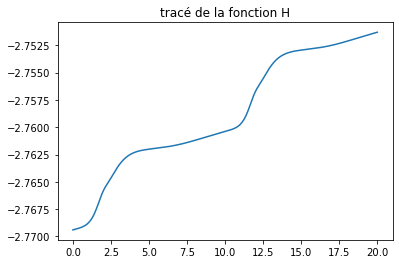

In [108]:
P=H(np.array(Proie_imp),np.array(Predateur_imp))

plt.plot(Z_Lotka_imp[0],P)
plt.title("tracé de la fonction H")

On observe ici la même tendance que pour Euler explicite

# Q9)

H(x) = H(x(0)) car dH/dt = 0 

# Q10)

# Q11)

Pour garantir la stabilité de H